In [85]:
import data_exploration_final as de
import algorithm_pipeline as ap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from __future__ import division
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm, metrics, tree, decomposition, svm, model_selection
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import random
from datetime import datetime
from datetime import timedelta
import pylab as pl
from scipy import optimize
import importlib
importlib.reload(de)
importlib.reload(ap)

<module 'algorithm_pipeline' from '/Users/mariomoreno/Desktop/Grad School/Machine Learning/Homeworks/HW4/algorithm_pipeline.py'>

# 1) Load and Clean the Data

Read in the date into two separate dataframes, outcomes and projects

In [2]:
unclean_outcomes = de.read_data('outcomes.csv', 0)

In [3]:
unclean_projects = de.read_data('projects.csv', 0)

In [4]:
unclean_outcomes.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


Outcomes includes our label. In order to protect from leaking data from the future into my dataset, I will drop the other variables for this dataframe because these are things I would only know once my project has been funded. I wouldn't know this information at time of prediciton.

In [5]:
unclean_outcomes = unclean_outcomes.loc[:,['projectid','fully_funded']]
unclean_outcomes.head()

,projectid,fully_funded
0,ffffc4f85b60efc5b52347df489d0238,f
1,ffffac55ee02a49d1abc87ba6fc61135,t
2,ffff97ed93720407d70a2787475932b0,t
3,ffff418bb42fad24347527ad96100f81,f
4,ffff2d9c769c8fb5335e949c615425eb,t


In [6]:
unclean_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [7]:
unclean_projects['date_posted'] = pd.to_datetime(unclean_projects['date_posted'])
unclean_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


Make sure that our date variables are in date time format so we can cut this by date.

In [8]:
new_unclean_projects = (unclean_projects['date_posted'] > '2011-01-01') & (unclean_projects['date_posted'] <= '2013-12-31')

In [9]:
unclean_projects = unclean_projects.loc[new_unclean_projects]

In [10]:
unclean_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
44772,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,...,Other,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,f,f,2013-12-31
44773,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402.0,urban,...,Supplies,high poverty,Grades 3-5,30.0,233.24,274.40,30.0,f,f,2013-12-31
44774,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,...,Technology,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,f,f,2013-12-31
44775,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,232.94,274.05,18.0,f,f,2013-12-31
44776,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613.0,urban,...,Supplies,highest poverty,Grades 6-8,30.0,513.41,604.01,70.0,t,f,2013-12-31


We've identified the projects that occur within the specified dates, now we need to join them with outcomes on projectid. 

In [11]:
merged = pd.merge(unclean_projects, unclean_outcomes, on = 'projectid')
merged.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,fully_funded
0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,...,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,f,f,2013-12-31,t
1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402.0,urban,...,high poverty,Grades 3-5,30.0,233.24,274.40,30.0,f,f,2013-12-31,f
2,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,...,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,f,f,2013-12-31,f
3,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224.0,urban,...,highest poverty,Grades PreK-2,30.0,232.94,274.05,18.0,f,f,2013-12-31,f
4,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613.0,urban,...,highest poverty,Grades 6-8,30.0,513.41,604.01,70.0,t,f,2013-12-31,t



Summary stats for projectid
count                               352790
unique                              352790
top       aa66e41e70e883fb351ced048ef878b5
freq                                     1
Name: projectid, dtype: object


Summary stats for teacher_acctid
count                               352790
unique                              157056
top       214acf23d183dfa2f1dc16e7b3658320
freq                                   174
Name: teacher_acctid, dtype: object


Summary stats for schoolid
count                               352790
unique                               44808
top       9943fdb43ab5f2b53f27e961caf9e90a
freq                                   476
Name: schoolid, dtype: object


Summary stats for school_ncesid
count    3.279590e+05
mean     2.502985e+11
std      1.648287e+11
min      1.000050e+10
25%      6.372001e+10
50%      2.400090e+11
75%      3.904440e+11
max      6.100008e+11
Name: school_ncesid, dtype: float64


Summary stats for school_latitude
count    352

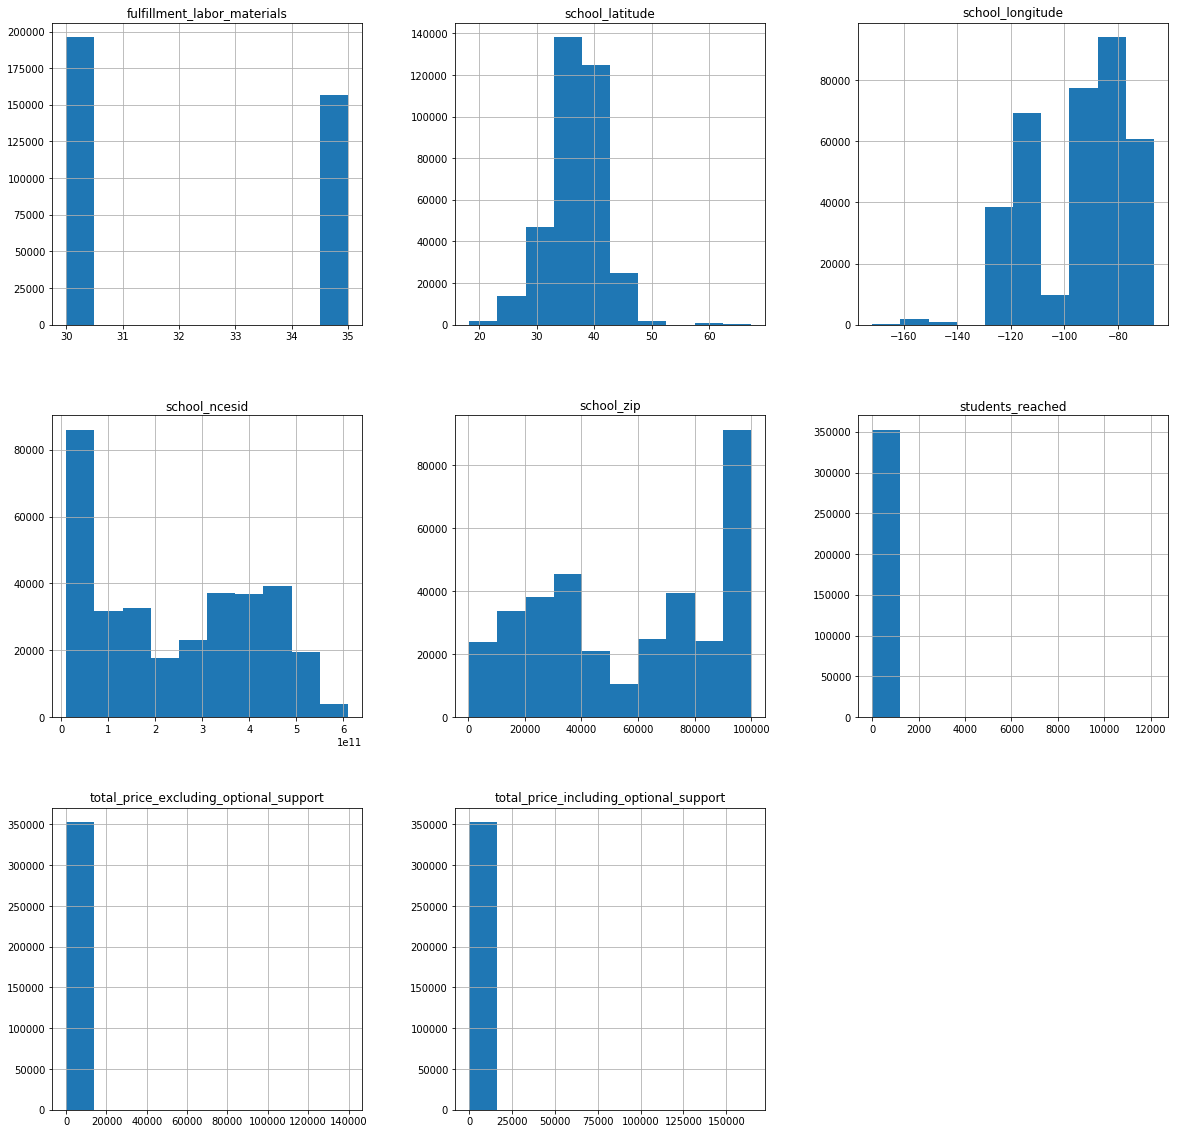

In [12]:
de.explore_data(merged)

Before splitting my data, I'll need to fill nulls, create a whole range of dummies for variables that aren't currently integers, and do some light cleaning of the data.

In [13]:
merged.shape

(352790, 36)

First step is to clean the data of outliers. From the exploration output above, I've identified students_reached, total_price_excluding_optional_support, and total_price_including_optional_support as potentially having outliers. I will remove those now.

In [14]:
merged = merged[((merged['students_reached'] - merged['students_reached'].mean()) / merged['students_reached'].std()).abs() < 3]
merged.shape

(342248, 36)

In [15]:
merged = merged[((merged['total_price_excluding_optional_support'] - merged['total_price_excluding_optional_support'].mean()) / merged['total_price_excluding_optional_support'].std()).abs() < 3]
merged.shape

(339959, 36)

In [16]:
merged = merged[((merged['total_price_including_optional_support'] - merged['total_price_including_optional_support'].mean()) / merged['total_price_including_optional_support'].std()).abs() < 3]
merged.shape

(332403, 36)

Next, I need to turn all variables that are True or False into binary 1 or 0 variables. Those have been identified in the one_zero list below.

In [17]:
one_zero = ['eligible_almost_home_match', 'eligible_double_your_impact_match', 'teacher_ny_teaching_fellow', 'teacher_teach_for_america', 'school_charter_ready_promise', 'school_kipp', 'school_nlns', 'school_year_round', 'school_magnet', 'school_charter', 'fully_funded'] 
de.true_to_false(merged, one_zero)
merged['fully_funded_new'].head()

0    1
1    0
2    0
3    0
4    1
Name: fully_funded_new, dtype: int64

In [18]:
merged.shape

(332403, 36)

Next, I'll go about deleting variables which I don't expect to be useful. Those include projectid, teacher_acctid, schoolid, and some location variables. I also will replace nulls in students_reached with a median of their values (all the other variables with nulls are being deleted). I'll be binning students_reached and total_price variables.

In [19]:
nulls_d = {'students_reached': 'median'}
delv = ['fulfillment_labor_materials','school_zip', 'teacher_acctid', 'schoolid', 'teacher_prefix','school_ncesid', 'school_latitude', 'school_longitude', 'school_city', 'school_state', 'school_district', 'school_county']
disc = ['students_reached', 'total_price_excluding_optional_support', 'total_price_including_optional_support']

clean_df = de.clean_data(merged, nulls_d, disc, [], delv)
clean_df.shape

(332403, 24)

I'll now take a look at correlations across different variables to understand which variables might need to be deleted because of multicollinearity.

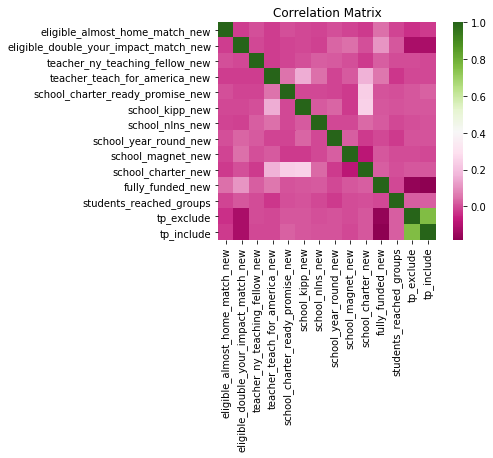

In [20]:
de.explore_potential_correlations(clean_df)

There appear to be strongly negative correlations between total price included, total price excluded and whether a project is fully funded. Naturally, total price included and total price excluded are correlated within themselves. No need to delete anything on account of correlations here

# 2) Data Exploration

I'll start graphing some of the data from the cleaned dataframe below to better understand what I have, and what questions I could answer upfront.

Histograms of all columns


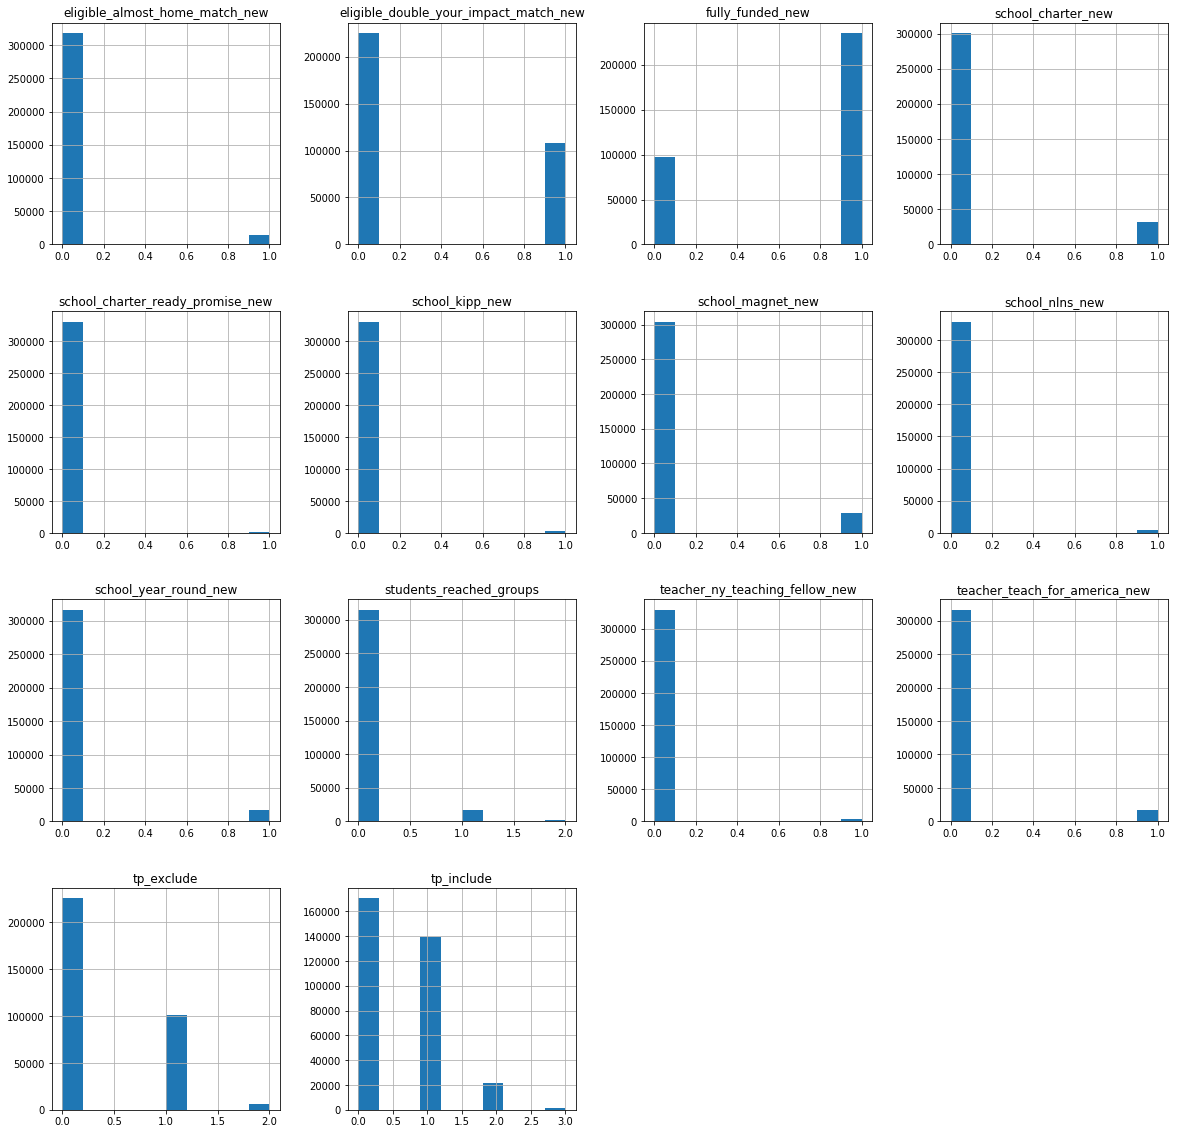

In [21]:
de.plot_data(clean_df, 'hist', None, None)

Some toplines here: Most projects are fully funded, the proportion of teach for america or ny teaching fellows in comparison to all projects is small, most projects are destined to reach a small number of students, and a match strategy tends to be more successful than a last chance to donate strategy

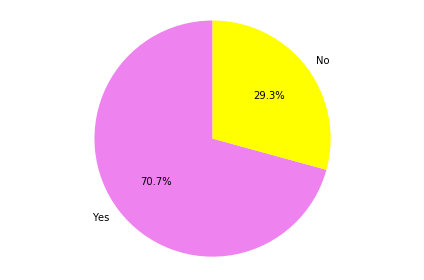

In [22]:
de.pie_vals(clean_df, 'fully_funded_new', labels = ('Yes', 'No'))

As we can see above, a majority of the projects wind up being funded. 

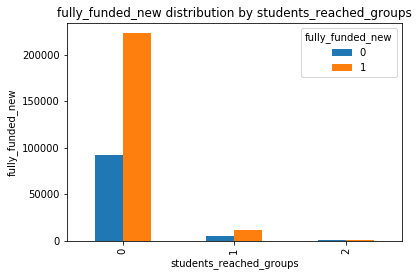

In [23]:
de.graph_crosstab(clean_df, 'students_reached_groups', 'fully_funded_new')

Across all groups of students reached, projects tend to be funded, but that difference is more pronounced the smaller the groups of students reached gets. Also, the gap between funded and unfunded projects for smaller groups is larger than for bigger groups of students reached

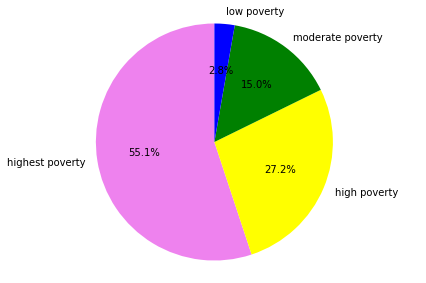

In [24]:
de.pie_vals(clean_df, 'poverty_level')

The vast majority of projects for which funding is requested are for those in highest poverty

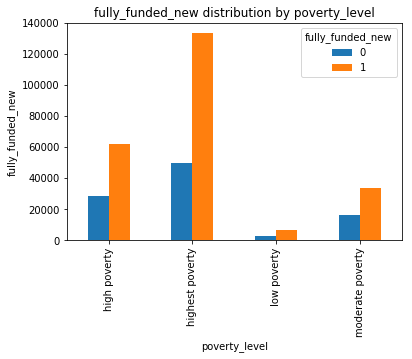

In [25]:
de.graph_crosstab(clean_df, 'poverty_level', 'fully_funded_new')

Across poverty levels, projects tend to get funded. That said, more projects are funded at higher poverty levels than not.

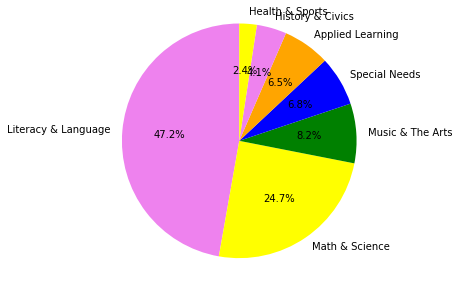

In [26]:
de.pie_vals(clean_df, 'primary_focus_area')

Literacy and Language account for close to half of all the project proposals, with Math and Science making up the bulk of the rest

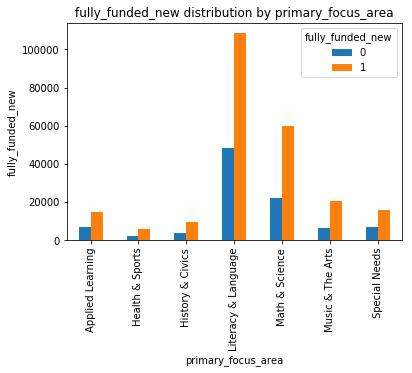

In [27]:
de.graph_crosstab(clean_df, 'primary_focus_area', 'fully_funded_new')

Across the board, projects in any subject area are more likely to get funded than not

# 3) Get Features and Split the Data

First I need a reminder of what I have in this dataframe

In [28]:
clean_df.head()

,projectid,school_metro,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,date_posted,...,school_charter_ready_promise_new,school_kipp_new,school_nlns_new,school_year_round_new,school_magnet_new,school_charter_new,fully_funded_new,students_reached_groups,tp_exclude,tp_include
0,62526d85d2a1818432d03d600969e99c,suburban,Special Needs,Special Needs,Literacy,Literacy & Language,Other,moderate poverty,Grades 3-5,2013-12-31,...,0,0,0,0,0,0,1,0,0,1
1,33d59ac771b80222ad63ef0f4ac47ade,urban,Mathematics,Math & Science,NaN,NaN,Supplies,high poverty,Grades 3-5,2013-12-31,...,0,0,0,0,0,0,0,0,0,0
2,1a3aaeffc56dd2a421e37d8298024c0a,suburban,Environmental Science,Math & Science,Applied Sciences,Math & Science,Technology,moderate poverty,Grades 6-8,2013-12-31,...,0,0,0,0,0,0,0,0,0,0
3,33aa19ee4da4c5adf47d0dfb84fab5ef,urban,Literacy,Literacy & Language,NaN,NaN,Other,highest poverty,Grades PreK-2,2013-12-31,...,0,0,0,0,0,0,0,0,0,0
4,e31c0ea8b68f404699dfb0d39e9bc99b,urban,Environmental Science,Math & Science,NaN,NaN,Supplies,highest poverty,Grades 6-8,2013-12-31,...,0,0,0,0,1,0,1,0,1,1


In [29]:
clean_df.shape

(332403, 24)

In [30]:
for c in clean_df:
    print(c)

projectid
school_metro
primary_focus_subject
primary_focus_area
secondary_focus_subject
secondary_focus_area
resource_type
poverty_level
grade_level
date_posted
eligible_almost_home_match_new
eligible_double_your_impact_match_new
teacher_ny_teaching_fellow_new
teacher_teach_for_america_new
school_charter_ready_promise_new
school_kipp_new
school_nlns_new
school_year_round_new
school_magnet_new
school_charter_new
fully_funded_new
students_reached_groups
tp_exclude
tp_include


One last bit of cleaning, I should drop projectid. Not likely to be predictive. 

In [31]:
del clean_df['projectid']

In [32]:
clean_df.shape

(332403, 23)

Time to turn some variables into dummies. 

In [33]:
to_dummy = ['students_reached_groups', 'tp_include', 'tp_exclude', 'school_metro','primary_focus_subject', 'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level']
new_df = de.dummify(merged, to_dummy)

In [34]:
new_df.shape

(332403, 118)

In [35]:
new_df.head()

,date_posted,eligible_almost_home_match_new,eligible_double_your_impact_match_new,teacher_ny_teaching_fellow_new,teacher_teach_for_america_new,school_charter_ready_promise_new,school_kipp_new,school_nlns_new,school_year_round_new,school_magnet_new,...,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,poverty_level_nan,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,grade_level_nan
0,2013-12-31,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,2013-12-31,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,2013-12-31,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,2013-12-31,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2013-12-31,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


Time to get my features

In [36]:
features = []
for c in new_df:
    features.append(c)

In [38]:
len(features)

118

Since I am predicting probability that a project will be funded in six months from time of posting, I will create test-train splits as follows:

- train data from 2011-01-01 to 2011-12-31, test through 2012-01-01 to 2012-07-01
- train data from 2011-01-01 to 2012-06-30, test on 2012-07-01 to 2012-12-31
- train data on 2011-01-01 to 2012-12-31, test on 2013-01-01 to 2013-06-30
- train data on 2011-01-01 to 2013-06-30, test on 2013-07-01 to 2013-12-31

In [74]:
date_ranges = {('2011-01-01', '2011-12-31'):('2012-01-01', '2012-06-30'), ('2011-01-01', '2012-06-30'):('2012-07-01','2012-12-31'), ('2011-01-01', '2012-12-31'):('2013-01-01', '2013-06-30'), ('2011-01-01', '2013-06-30'):('2013-07-01', '2013-12-31')}
train_test_lists = de.split_data(new_df, 'fully_funded_new', None, True, 'date_posted', date_ranges)

In [75]:
train_test_one = train_test_lists[0]
train_test_two = train_test_lists[1]
train_test_three = train_test_lists[2]
train_test_final = train_test_lists[3]

In [76]:
print(train_test_final[0].shape)
print(train_test_final[1].shape)
print(train_test_final[2].shape)
print(train_test_final[3].shape)

(251983, 116)
(251983, 1)
(80213, 116)
(80213, 1)


# 4) Machine Learning  

I will now run the train test splits over the magic loop. 

In [77]:
ser1 = train_test_one[1].T.squeeze()
ser1s = ser1.reshape(-1, 1)

/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [78]:
ser2 = train_test_one[3].T.squeeze()
ser2s = ser2.reshape(-1, 1)

/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [86]:
models_to_run = ['RF','DT', 'KNN', 'ET', 'AB', 'GB', 'LR', 'NB']
ap.go(train_test_one[0], train_test_one[2], ser1s, ser2s, 'test', models_to_run)

RF


/Users/mariomoreno/Desktop/Grad School/Machine Learning/Homeworks/HW4/algorithm_pipeline.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


DT
KNN


/Users/mariomoreno/Desktop/Grad School/Machine Learning/Homeworks/HW4/algorithm_pipeline.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)


ET


/Users/mariomoreno/Desktop/Grad School/Machine Learning/Homeworks/HW4/algorithm_pipeline.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


AB


/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GB


/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR


/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NB


,model_type,clf,parameters,time_used,auc-roc,accuracy,p_at_1,p_at_1,p_at_10,p_at_30,r_at_1,r_at_5,r_at_10,r_at_30
0,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.359523,0.516430,0.692773,1.000000,1.000000,1.000000,1.000000,0.014416,0.072166,0.144333,0.433028
1,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.235369,0.578236,0.692773,1.000000,1.000000,1.000000,1.000000,0.014416,0.072166,0.144333,0.433028
2,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",1796.973305,0.584350,0.659861,1.000000,1.000000,0.638294,0.806995,0.014416,0.072166,0.092127,0.349451
3,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.304251,0.503666,0.692773,1.000000,1.000000,1.000000,1.000000,0.014416,0.072166,0.144333,0.433028
4,AB,"(DecisionTreeClassifier(class_weight=None, cri...","{'algorithm': 'SAMME', 'n_estimators': 1}",0.411669,0.578236,0.692773,1.000000,1.000000,1.000000,1.000000,0.014416,0.072166,0.144333,0.433028
5,GB,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",1.041240,0.578236,0.692773,1.000000,1.000000,1.000000,1.000000,0.014416,0.072166,0.144333,0.433028
6,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",1.250430,0.647711,0.696290,0.844130,0.853215,0.846340,0.812791,0.012169,0.061573,0.122155,0.351961
7,NB,GaussianNB(priors=None),{},0.820449,0.614401,0.341110,0.801619,0.793773,0.796199,0.783206,0.011556,0.057284,0.114918,0.339150
